In [2]:
library(tidyverse)
library(lubridate)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [15]:
install.packages('dygraphs')

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
also installing the dependency ‘xts’



In [18]:
library(dygraphs)
library(xts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



In [4]:
cc_gs <- read_csv('/home/jupyter/work/bgprophet/data/libre/CharlieCampbell_glucose_5-8-2019.csv')

Parsed with column specification:
cols(
  Device = col_character(),
  `Serial Number` = col_character(),
  `Device Timestamp` = col_character(),
  `Record Type` = col_double(),
  `Historic Glucose mmol/L` = col_double(),
  `Scan Glucose mmol/L` = col_double(),
  `Non-numeric Rapid-Acting Insulin` = col_logical(),
  `Rapid-Acting Insulin (units)` = col_logical(),
  `Non-numeric Food` = col_logical(),
  `Carbohydrates (grams)` = col_logical(),
  `Carbohydrates (servings)` = col_logical(),
  `Non-numeric Long-Acting Insulin` = col_logical(),
  `Long-Acting Insulin Value (units)` = col_logical(),
  Notes = col_logical(),
  `Strip Glucose mmol/L` = col_logical(),
  `Ketone mmol/L` = col_logical(),
  `Meal Insulin (units)` = col_logical(),
  `Correction Insulin (units)` = col_logical(),
  `User Change Insulin (units)` = col_logical()
)
Warning message:
“81 parsing failures.
 row                               col           expected actual                                                       

In [31]:
data <- cc_gs %>% select('Device Timestamp', 'Historic Glucose mmol/L') %>% rename(time = 'Device Timestamp', gs = 'Historic Glucose mmol/L')

In [ ]:
data$time 

Warning message:
“Removed 882 rows containing missing values (geom_point).”

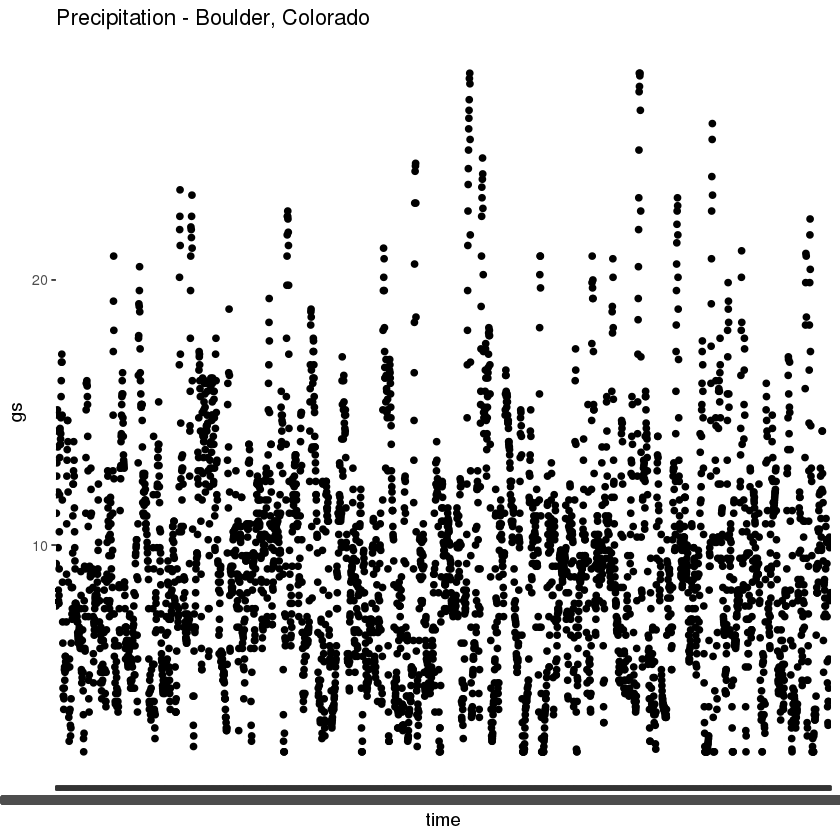

In [32]:
ggplot(data=data, aes(x = time, y = gs)) +
      geom_point() +
      labs(title = "")

Warning message:
“Removed 4 rows containing missing values (geom_path).”

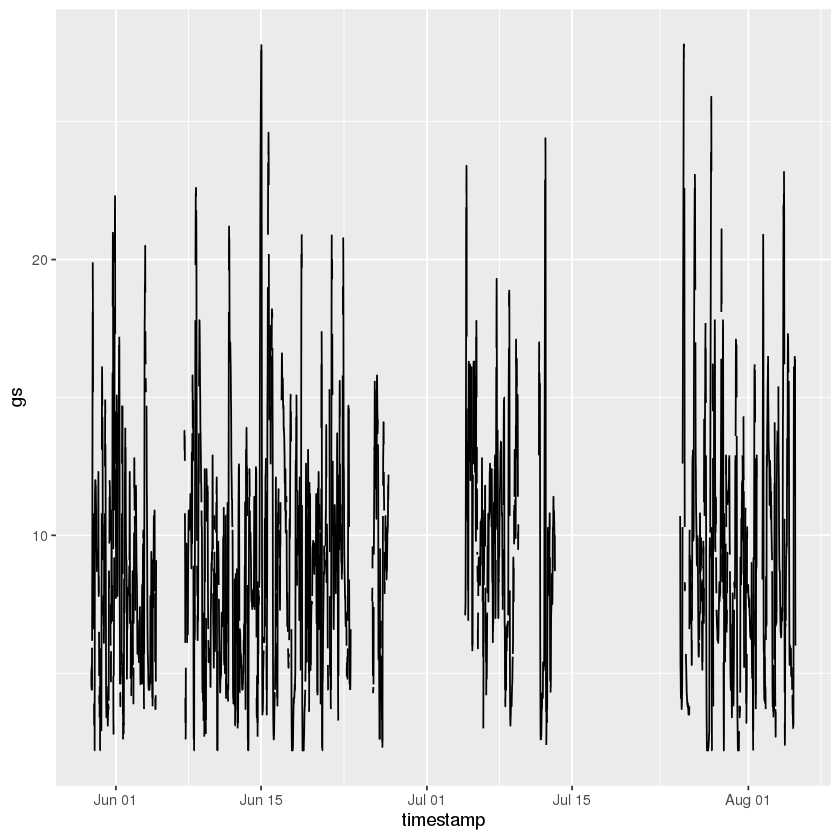

In [8]:
cc_gs_p %>% ggplot(aes(timestamp, gs)) + geom_line()
# ggsave('gs_case_study.pdf', width = 20, height = 10,limitsize = FALSE)

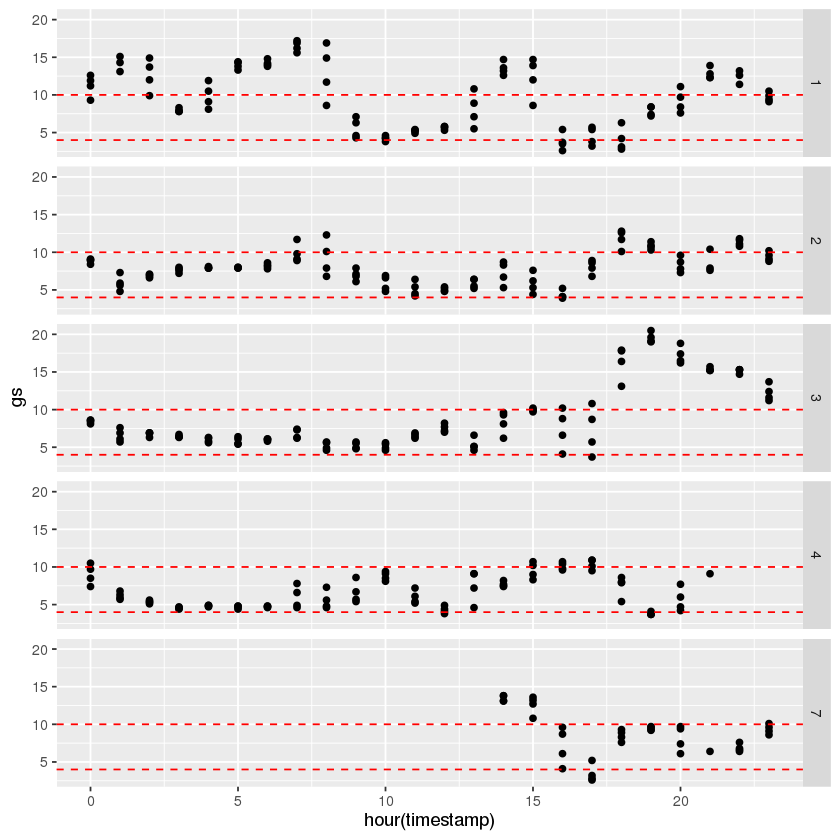

In [73]:
cc_gs_p %>%
filter(timestamp>'2019-06-01' & timestamp<'2019-06-08') %>%
mutate(day = day(timestamp)) %>%
na.omit() %>%
ggplot(aes(hour(timestamp), gs)) + geom_point() + facet_grid(day~.)+ 
geom_hline(aes(yintercept=10),colour='red', linetype="dashed")+(geom_hline(aes(yintercept=4),colour='red',linetype="dashed"))